In [5]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random

In [6]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [7]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

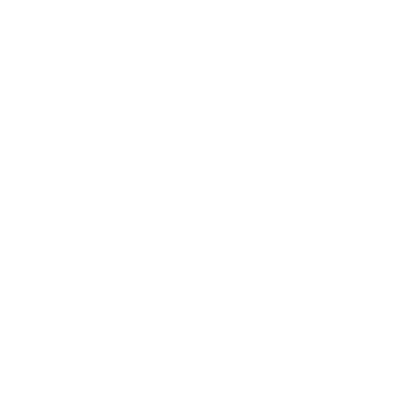

In [98]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 400) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2],
legend=:none, grid=false, ticks=:none, ratio=:equal,
    cb=:none, size=(400, 400), margins=-2mm, frame=:none)

In [100]:
savefig(plt, "test.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\examples\\test.svg"

In [25]:
ops = gaussian_operators_2D(0.03, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), var"#Φ#202"{var"#ϕ#201"{Int64}, Int64}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), var"#adjΦ#207"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#199#208"{var"#ϕ#201"{Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#199#208"{var"#ϕ#201"{Int64}}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#)

## Pre-certificate

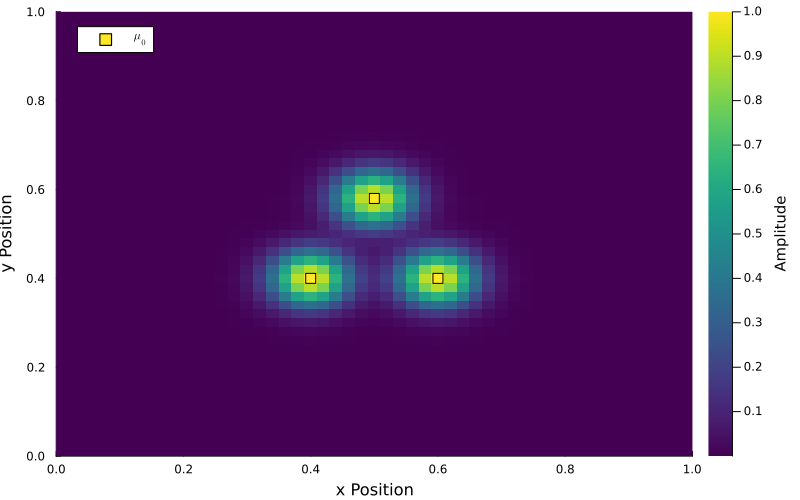

In [ ]:
x0 = [[0.4, 0.5, 0.6], [0.4, 0.58, 0.4]]
a0 = [1.0, 1.0, 1.0]

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

### SFW

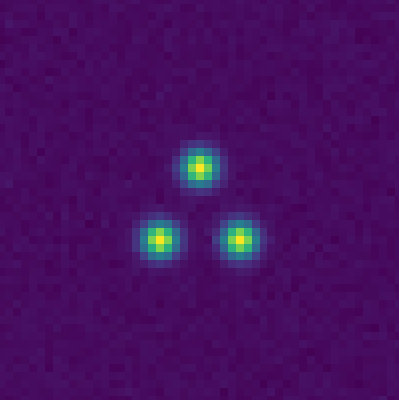

In [102]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.1
y = add_noise(y0, noise_level)

plt_obs = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y, size(plt_grid_x1)), color=:viridis)
# plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square, markersize=5, markerstrokewidth=1)

In [140]:
prob = BLASSO(y, ops, domain)

plt_cert_behav = deepcopy(plt_obs)

solve!(prob, :SFW, options=Dict(:descent => :BFGS, :maxits => 5, :positivity => true), δ = noise_level, τ = 4, q = 0.8, λ0 = 100)
# plot_spikes!(plt_cert_behav, prob.μ, label=L"\hat{μ}", marker=:circle)

λ: 100
  0.212933 seconds (24.12 k allocations: 169.075 MiB, 30.84% gc time)
r: 4.633874948296901
τδ: 0.4
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 80.0
  0.081858 seconds (26.17 k allocations: 181.645 MiB, 16.15% gc time)
r: 4.633874948296901
τδ: 0.4
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 64.0
  0.080202 seconds (37.45 k allocations: 262.069 MiB, 21.11% gc time)
r: 4.633874948296901
τδ: 0.4
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 51.2
  0.067787 seconds (28.98 k allocations: 200.686 MiB, 21.50% gc time)
r: 4.633874948296901
τδ: 0.4
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 40.96000000000001
  0.052374 seconds (23.74 k allocations: 163.696 MiB, 19.58% gc time)
r: 4.633874948296901
τδ: 0.4
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 32.76800000000001
  0.061365 seconds (24.74 k allocations: 170.871 MiB, 21.77% gc time)
r: 4.633874948296901
τδ: 0.4
pro

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.532004 seconds (247.17 k allocations: 1.553 GiB, 19.40% gc time)
r: 4.3930867535375615
τδ: 0.4
prob.μ: DiscreteMeasure([[0.41, 0.6099999999999999, 0.39000000000000007, 0.59, 0.6099999999999999], [0.39, 0.41, 0.41, 0.39, 0.39]], [0.04134984484193169, 0.03115278407869801, 0.038038620826173514, 0.02360094932086823, 0.017331421990410795], 2, 5)

λ: 5.497558138880003


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.632550 seconds (278.49 k allocations: 1.757 GiB, 20.37% gc time)
r: 3.474821255706578
τδ: 0.4
prob.μ: DiscreteMeasure([[0.41, 0.6099999999999999, 0.49, 0.39, 0.59], [0.39, 0.41, 0.5899999999999997, 0.41, 0.39]], [0.12777993872120205, 0.1263411589760333, 0.22653113576406883, 0.1245201396760908, 0.11890567982540148], 2, 5)

λ: 4.398046511104003


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.713195 seconds (276.82 k allocations: 1.813 GiB, 17.85% gc time)
r: 2.8467754641783207
τδ: 0.4
prob.μ: DiscreteMeasure([[0.41, 0.6099999999999999, 0.49000000000000005, 0.39000000000000096, 0.5900000000000003], [0.39000000000000046, 0.41, 0.5899999999999997, 0.40999999999999953, 0.39]], [0.19692538849783123, 0.19550160135174352, 0.3510841729342623, 0.19370478109207265, 0.18807581537108028], 2, 5)

λ: 3.5184372088832023


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.605917 seconds (221.59 k allocations: 1.521 GiB, 16.61% gc time)
r: 2.332655378672676
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40315275355788416, 0.6042950975790423, 0.49512217786150764, 0.59, 0.39], [0.39708529400437076, 0.4040973795615835, 0.5822021255929003, 0.39, 0.4099999999999999]], [0.2627328767014623, 0.27156555317187436, 0.49739204912940094, 0.22271330384401336, 0.2357343572088945], 2, 5)

λ: 2.814749767106562


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.927284 seconds (456.87 k allocations: 4.992 GiB, 16.55% gc time)
r: 1.848986281119984
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4099999999999608, 0.6099999999999838, 0.499414928284689, 0.5899999999999999, 0.39], [0.38999999999999496, 0.4099999999999713, 0.5802724215190722, 0.3899999999999997, 0.40999999999999626]], [0.2964968447041154, 0.2952450085151173, 0.6045642978228978, 0.2875248629922817, 0.29332682528535153], 2, 5)

λ: 2.25179981368525


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.476849 seconds (412.65 k allocations: 4.075 GiB, 15.89% gc time)
r: 1.515644280152797
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4099999999999983, 0.6099999999999982, 0.4996628211219521, 0.5900000000001137, 0.39], [0.3900000000001857, 0.40999999999999226, 0.5801579561675545, 0.390000000000676, 0.40999999999869313]], [0.33189949994440404, 0.3306668004531529, 0.684280759574511, 0.3229277118380245, 0.3287489295095647], 2, 5)

λ: 1.8014398509482001


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.519681 seconds (402.55 k allocations: 4.245 GiB, 15.82% gc time)
r: 1.2568050591941797
τδ: 0.4
prob.μ: DiscreteMeasure([[0.409999999979884, 0.6099999999904082, 0.49974821434457845, 0.5900000000046977, 0.38999999999869117], [0.39, 0.4099999999874079, 0.5801183783221254, 0.39000000000495133, 0.40999999999813025]], [0.3602218731485832, 0.35900526670889765, 0.748010145564187, 0.3512488227892724, 0.3570854278788307], 2, 5)

λ: 1.4411518807585602


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:02


  2.765617 seconds (989.45 k allocations: 7.602 GiB, 16.22% gc time)
r: 1.064455572633977
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40530731679610055, 0.6088345104078825, 0.49979058720260766, 0.5912255197170083, 0.3900000000000004], [0.39485875930173614, 0.4087562941192768, 0.5800985973102842, 0.39114570522923126, 0.40965938417991365]], [0.578911596633547, 0.381830227263748, 0.7989854189022534, 0.3741905946174504, 0.20245915096214673], 2, 5)

λ: 1.1529215046068482


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.747637 seconds (510.52 k allocations: 4.891 GiB, 16.17% gc time)
r: 0.9090464261477244
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40999999395200476, 0.609999999993696, 0.4998154203191044, 0.5900000033812343, 0.39000000000492124], [0.39000000000000007, 0.4099999876121364, 0.5800871956518796, 0.39000000977156235, 0.4099999999557475]], [0.4010125088057455, 0.39981467432603673, 0.8397669421377872, 0.3920358917430848, 0.397885964763145], 2, 5)

λ: 0.9223372036854786


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.560111 seconds (455.81 k allocations: 4.223 GiB, 16.43% gc time)
r: 0.8003233203554645
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4004395986010899, 0.6088485427542364, 0.49984255902525454, 0.5912278393478961, 0.39964751543345417], [0.3897399069514514, 0.409886097502657, 0.5800894792122814, 0.39000000000000057, 0.4068819127622047]], [0.45142236257902746, 0.41441443157980845, 0.8723820161257076, 0.4067421748930507, 0.40065689924854836], 2, 5)

λ: 0.7378697629483829


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.549956 seconds (455.42 k allocations: 4.216 GiB, 16.23% gc time)
r: 0.7118692185577842
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40982507397065837, 0.608572738660284, 0.4998438616758061, 0.5915857264276883, 0.3900212124277432], [0.40945936881215106, 0.4099999925885802, 0.5800757471947183, 0.3900000000000005, 0.3900402540036396]], [0.43378001974128777, 0.427738273943037, 0.8984724976577558, 0.4236039564936769, 0.4191196543508742], 2, 5)

λ: 0.5902958103587064


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.036754 seconds (319.94 k allocations: 2.831 GiB, 15.85% gc time)
r: 0.6189573383919266
τδ: 0.4
prob.μ: DiscreteMeasure([[0.3999255508926324, 0.6037423147138079, 0.4998943329226431, 0.589999961211897, 0.6100006230088023], [0.39990904815916767, 0.40999999999999975, 0.580001973217629, 0.39036911910187944, 0.3901495407287148]], [0.9204668964589708, 0.4294620468457115, 0.9193640504449679, 0.310758619306102, 0.12995152054646392], 2, 5)

λ: 0.4722366482869651

SFW iterations:  40%|███████████████                    |  ETA: 0:00:00

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.388642 seconds (386.70 k allocations: 3.683 GiB, 16.34% gc time)
r: 0.5634403518732279
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000235072822434, 0.6032607984000621, 0.4998477294232772, 0.609687082566345, 0.5972986436936957], [0.3999578373743242, 0.4099999999999999, 0.5800763013806302, 0.40357116657136444, 0.3900115409838756]], [0.9376816206407661, 0.452976678920102, 0.935824266909321, 0.005948707690149896, 0.4443258264671074], 2, 5)

λ: 0.3777893186295721


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.252460 seconds (402.12 k allocations: 3.342 GiB, 16.21% gc time)
r: 0.5345476739298676
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002791261673765, 0.5991463634064349, 0.4998650015043639, 0.5900199232262641, 0.6099999698542405], [0.3999467072609726, 0.40999999999999975, 0.5800687026091206, 0.39009390388213155, 0.39000001255692335]], [0.9504974301251445, 0.4564410792348038, 0.9494654133849987, 0.20110135007032448, 0.24732866611128027], 2, 5)

λ: 0.3022314549036577


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.553263 seconds (392.60 k allocations: 4.094 GiB, 16.02% gc time)
r: 0.5127771052247332
τδ: 0.4
prob.μ: DiscreteMeasure([[0.3921127878057105, 0.5966391256598631, 0.4998629381718205, 0.6029461605794818, 0.40999999999993064], [0.40211841174642343, 0.40962049316947136, 0.5800655883154554, 0.392281901316302, 0.3972277177855806]], [0.5261624800150041, 0.4161415512801979, 0.9601123353389153, 0.5160447757816988, 0.4126874704159223], 2, 5)

λ: 0.24178516392292618


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.410421 seconds (346.41 k allocations: 3.686 GiB, 15.87% gc time)
r: 0.49420680098327574
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4032254218511318, 0.5967884827957898, 0.49986544916125486, 0.6025993930192557, 0.3900000000000031], [0.39678327105151656, 0.4089668352905868, 0.5800628707823985, 0.3933977169327961, 0.4099992535983678]], [0.7322208511303506, 0.4019093384011136, 0.9686693785790157, 0.5428894721810729, 0.22081326461845346], 2, 5)

λ: 0.19342813113834095


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.579552 seconds (424.54 k allocations: 4.003 GiB, 16.34% gc time)
r: 0.4823177846798805
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4050684781589266, 0.5969495301732429, 0.4998674795259393, 0.6021693624539789, 0.3900000000000276], [0.39838906899216503, 0.4087121454083022, 0.5800632578493294, 0.3944291935074561, 0.4030632577080777]], [0.6448364335299336, 0.37347737054287106, 0.9755066419138259, 0.5814085588347889, 0.3169180121082491], 2, 5)

λ: 0.15474250491067276


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.130720 seconds (354.95 k allocations: 2.990 GiB, 16.50% gc time)
r: 0.47833404682084174
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40266305963373306, 0.5969871270834906, 0.4998714951237927, 0.6018516294458754, 0.3900000000000003], [0.3974134381734361, 0.40857457766100236, 0.5800663517435816, 0.39531372865852465, 0.4096240245448505]], [0.793012228993865, 0.3378876888327279, 0.9809793453330488, 0.6248605234763889, 0.16953695665860996], 2, 5)

λ: 0.12379400392853822


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.340436 seconds (367.11 k allocations: 3.534 GiB, 16.46% gc time)
r: 0.46928085290811294
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4039234850969277, 0.5967761902674354, 0.49987022670524767, 0.6014041551028632, 0.3913505697117392], [0.39871437588768377, 0.409216446039677, 0.5800618699528666, 0.3964999277910177, 0.40271348731714857]], [0.6775560431825944, 0.2671251298517635, 0.9853587718227935, 0.7024085537835025, 0.2987978895511334], 2, 5)

λ: 0.09903520314283058


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.629243 seconds (461.07 k allocations: 4.364 GiB, 16.47% gc time)
r: 0.46564219587909106
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002799205185396, 0.5981673800226255, 0.49987118417348825, 0.6033064292130194, 0.5962850306651082], [0.3999531291075976, 0.4099999999999744, 0.5800614159420265, 0.3966626792696658, 0.3984212812034612]], [0.9899569247885633, 0.20588531873207014, 0.9888835760635581, 0.4754669119573438, 0.29140056243790863], 2, 5)

λ: 0.07922816251426447


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.265532 seconds (336.44 k allocations: 3.406 GiB, 16.61% gc time)
r: 0.46341566405126355
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002845720238567, 0.5919161818742589, 0.4998726336279796, 0.5985154846012773, 0.601978311737154], [0.39995371861498624, 0.40999999999982495, 0.5800612921554655, 0.40437251710791605, 0.3950703768624215]], [0.9927774000466076, 0.0030155323402210237, 0.9916620852074237, 0.5207829996543764, 0.455170084707544], 2, 5)

λ: 0.06338253001141157


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.729796 seconds (284.29 k allocations: 1.889 GiB, 17.07% gc time)
r: 0.461266998757095
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000278655833494, 0.6001053914474926, 0.49987268866328904, 0.83, 0.15], [0.39995364053012034, 0.40006009118022545, 0.5800604437422123, 0.91, 0.05]], [0.9950139106431704, 0.9880274017668662, 0.9939077826077409, 0.002989328364614465, 0.0011927556005290139], 2, 5)

λ: 0.05070602400912926


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.616371 seconds (224.18 k allocations: 1.519 GiB, 17.48% gc time)
r: 0.46024504800345084
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000277633755558, 0.6001050198812253, 0.4998731366497134, 0.83, 0.14999999999999605], [0.3999538070230044, 0.40005987345536126, 0.5800602154617919, 0.9099999999999995, 0.04999999999999424]], [0.9968072343590187, 0.9898207482466942, 0.9957011526772288, 0.004425338578789489, 0.0026311699440075076], 2, 5)

λ: 0.04056481920730341


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.831112 seconds (287.74 k allocations: 2.172 GiB, 17.36% gc time)
r: 0.45955008842474865
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000276684447529, 0.6001047151921821, 0.49987349284417004, 0.8300000000000846, 0.15000000000000002], [0.39995394107169974, 0.40005969332468455, 0.5800600649388247, 0.9186791667753674, 0.049999999999999996]], [0.9982418938045028, 0.9912554268026167, 0.9971358463978088, 0.00595057869657938, 0.003781901418790301], 2, 5)

λ: 0.03245185536584273


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.639659 seconds (239.51 k allocations: 1.709 GiB, 16.87% gc time)
r: 0.4591152357169317
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002759931602205, 0.6001044793242837, 0.49987378143563804, 0.8311685555405561, 0.15], [0.39995404624132064, 0.400059554962956, 0.5800599322837117, 0.9185617706960149, 0.05]], [0.9993896210589096, 0.9924031683855299, 0.9982836027632721, 0.007063164302443817, 0.004702486598616539], 2, 5)

λ: 0.025961484292674187


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.670563 seconds (242.74 k allocations: 1.704 GiB, 17.36% gc time)
r: 0.4588326304963572
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000275462782042, 0.6001042920965118, 0.4998740327311499, 0.8326666042327022, 0.15000000000000002], [0.39995412631625743, 0.40005944027511325, 0.5800598042313285, 0.9182932093595966, 0.049999999999999996]], [1.0003078025856131, 0.9933213617472264, 0.9992018122152834, 0.008012640684383995, 0.005438954742477526], 2, 5)

λ: 0.02076918743413935


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.713571 seconds (266.54 k allocations: 1.848 GiB, 17.12% gc time)
r: 0.45865228885061127
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000275073286235, 0.6001041417630986, 0.4998742015526096, 0.8334975832098611, 0.15], [0.39995419249461484, 0.4000593526541243, 0.5800597394296243, 0.9182872008300118, 0.05]], [1.0010423478263748, 0.9940559162849564, 0.999936372791347, 0.008760389764193448, 0.006028129257566318], 2, 5)

λ: 0.01661534994731148


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.633703 seconds (229.30 k allocations: 1.602 GiB, 17.40% gc time)
r: 0.45853699350326005
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000274668081362, 0.6001040189016705, 0.4998743436054903, 0.8340194723339731, 0.15], [0.3999542450057252, 0.4000592843845967, 0.5800596695135704, 0.9183222645145291, 0.05]], [1.001629984270451, 0.9946435601050119, 1.0005240234501145, 0.009354731487940363, 0.006499468869637351], 2, 5)

λ: 0.013292279957849186


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.868363 seconds (321.90 k allocations: 2.207 GiB, 17.00% gc time)
r: 0.4584632311400501
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000274391012364, 0.6001039256669901, 0.4998744599907311, 0.8343751669377072, 0.15], [0.399954292308354, 0.40005922674912403, 0.5800596164330842, 0.9183632253459817, 0.05]], [1.0021000935641187, 0.9951136747790652, 1.0009941441804624, 0.009828929627425886, 0.006876540559294177], 2, 5)

λ: 0.010633823966279349


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.949333 seconds (283.91 k allocations: 2.456 GiB, 16.36% gc time)
r: 0.45841062003435107
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000274194994604, 0.6001038201279488, 0.49987454174550244, 0.834628080817882, 0.14781887000218605], [0.39995432226503047, 0.4000591745847128, 0.580059562207388, 0.9183999535227282, 0.049999999999375]], [1.0024776173950323, 0.9954872885791962, 1.0013705089097338, 0.010210684800202374, 0.007350052331828461], 2, 5)

λ: 0.00850705917302348


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.746775 seconds (244.34 k allocations: 1.840 GiB, 17.60% gc time)
r: 0.45837908340958217
τδ: 0.4
prob.μ: DiscreteMeasure([[0.400027397481486, 0.6001037823650015, 0.49987462389596643, 0.8348137945990945, 0.147378109732307], [0.3999543497372867, 0.40005915166361605, 0.5800595360164325, 0.9184306880711113, 0.049609419757588716]], [1.0027770849804187, 0.9957906352095798, 1.0016711336186586, 0.010510160733998793, 0.007658859635596184], 2, 5)

λ: 0.006805647338418784


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.802597 seconds (276.32 k allocations: 2.051 GiB, 16.90% gc time)
r: 0.45835869935244133
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002737985504794, 0.600103738291471, 0.4998746845637431, 0.8349525114787362, 0.14705509488231513], [0.3999543708932952, 0.4000591224044977, 0.5800595079879216, 0.9184554107821551, 0.04925368770374912]], [1.0030177864834517, 0.9960313621265398, 1.0019118356695265, 0.01075234835464566, 0.007914750239755871], 2, 5)

λ: 0.005444517870735028


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.732747 seconds (254.13 k allocations: 1.881 GiB, 16.77% gc time)
r: 0.45834567226312506
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002737450441866, 0.6001037005294256, 0.4998747361937633, 0.8350559404051402, 0.1468155157675775], [0.39995439127647936, 0.40005909451030885, 0.5800594886019548, 0.918479450343613, 0.04898616648021601]], [1.0032102508194682, 0.99622388727034, 1.0021044484937047, 0.01094550420990489, 0.008118783775192949], 2, 5)

λ: 0.004355614296588022


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.751932 seconds (262.22 k allocations: 1.933 GiB, 16.62% gc time)
r: 0.4583373381587909
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002736477787637, 0.6001036677971913, 0.4998747741260579, 0.8351384262797394, 0.14663484890568404], [0.3999544057583348, 0.400059074910078, 0.5800594715604522, 0.9184924358252813, 0.048779862769104204]], [1.0033643345795025, 0.996377887440426, 1.0022583670148424, 0.011100752433619928, 0.008281049374289163], 2, 5)

λ: 0.003484491437270418


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.654215 seconds (224.85 k allocations: 1.708 GiB, 16.77% gc time)
r: 0.45833200345387765
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002735895639163, 0.6001036432016058, 0.49987479544184016, 0.8352021237386903, 0.14649376465314218], [0.39995441193329473, 0.40005906621566517, 0.5800594556278812, 0.9185033684225766, 0.04862624077474854]], [1.0034877975735759, 0.9965014109435749, 1.0023823738135065, 0.01122395330603496, 0.00841063572243067], 2, 5)

λ: 0.0027875931498163344


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.727482 seconds (243.37 k allocations: 1.812 GiB, 17.15% gc time)
r: 0.4583285981131433
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002733882074143, 0.6001036274842229, 0.49987482522968496, 0.8352506694378682, 0.14638912519161024], [0.39995442223858796, 0.4000590492160451, 0.5800594466551332, 0.9185143959432911, 0.04849711995864927]], [1.0035861674745539, 0.9965997342029156, 1.002480249716336, 0.011323226533827427, 0.008514505874241388], 2, 5)

λ: 0.0022300745198530676


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:02


  2.413964 seconds (808.30 k allocations: 5.481 GiB, 17.15% gc time)
r: 0.4583264128394429
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273452874511, 0.6001036051517588, 0.4998748489715618, 0.8352890323754754, 0.14630610678581107], [0.3999544324238986, 0.40005904003215703, 0.5800594320801541, 0.9185225713321683, 0.04840022997852446]], [1.0036650392820177, 0.996678643099957, 1.0025591390185669, 0.01140306618995707, 0.008597234203803305], 2, 5)

λ: 0.0017840596158824541


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.929712 seconds (291.65 k allocations: 2.123 GiB, 16.41% gc time)
r: 0.4583250248559322
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273644147958, 0.600103615752118, 0.4998748896746565, 0.8353194896391519, 0.14626726196236936], [0.39995442204865783, 0.4000590566741644, 0.5800594288478425, 0.9185289424624277, 0.04830632487332457]], [1.0037248170711117, 0.9967403506476936, 1.0026249594135017, 0.01146487011929585, 0.008665111362246802], 2, 5)

λ: 0.0014272476927059633


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.691505 seconds (228.39 k allocations: 1.710 GiB, 16.88% gc time)
r: 0.4583241227014172
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273413253844, 0.6001035862453837, 0.4998748776274186, 0.835343298376793, 0.14618761574164618], [0.3999544420238146, 0.4000590272897, 0.5800594236301362, 0.9185340391102674, 0.048264714932059964]], [1.0037786011962524, 0.9967922237028286, 1.002672735202543, 0.011517531733832301, 0.008716280800000687], 2, 5)

λ: 0.0011417981541647707


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.767272 seconds (241.53 k allocations: 1.786 GiB, 16.24% gc time)
r: 0.45832355270098923
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002732258407, 0.6001035597574201, 0.4998748984802619, 0.835362312729657, 0.1461469053483765], [0.3999544689281016, 0.4000590219027769, 0.5800594143597237, 0.9185381492736743, 0.04821102089952267]], [1.0038189982418724, 0.9968326316204438, 1.0027132790516253, 0.011557461032892397, 0.008758514120101106], 2, 5)

λ: 0.0009134385233318166


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.716918 seconds (242.18 k allocations: 1.816 GiB, 16.75% gc time)
r: 0.4583231876544048
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002733449877204, 0.6001035712342051, 0.49987489664184925, 0.8353773824803944, 0.14611576337194393], [0.3999544478466516, 0.40005901757788276, 0.5800594165044075, 0.9185414301665031, 0.048177405586067076]], [1.003851307300212, 0.9968649100511404, 1.0027454025631182, 0.011589713116281507, 0.008792394835243961], 2, 5)

λ: 0.0007307508186654533


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:01


  1.048905 seconds (361.02 k allocations: 2.576 GiB, 16.89% gc time)
r: 0.45832295180566923
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002733448418315, 0.6001035654868813, 0.4998749004881019, 0.8353893376043295, 0.14609005576949782], [0.3999544505577733, 0.40005901382686876, 0.5800594126147671, 0.9185441232191003, 0.04814755594974187]], [1.003877162540431, 0.9968922380780472, 1.002771126967102, 0.011615398279977955, 0.00881942316479948], 2, 5)

λ: 0.0005846006549323627


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.801823 seconds (274.93 k allocations: 2.006 GiB, 16.93% gc time)
r: 0.45832280285071014
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273336032379, 0.6001035604761418, 0.49987490603839196, 0.8353988642020622, 0.14606979316200697], [0.3999544527381897, 0.4000590125560032, 0.5800594100454756, 0.9185461986203721, 0.0481235245322824]], [1.0038977930839919, 0.996912416127002, 1.0027917792220578, 0.011636288269574604, 0.008841068890808094], 2, 5)

λ: 0.0004676805239458902


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.917379 seconds (264.75 k allocations: 1.933 GiB, 17.79% gc time)
r: 0.4583226992148899
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273397379592, 0.6001035532928951, 0.4998748982589336, 0.835406287699909, 0.14605364780499008], [0.3999544581990161, 0.40005901521673953, 0.5800594067733436, 0.9185477242702748, 0.048104876214055604]], [1.0039156322980978, 0.9969291368335297, 1.0028118746668162, 0.011656004165996174, 0.00885816515594674], 2, 5)

λ: 0.0003741444191567122


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.804592 seconds (272.27 k allocations: 1.985 GiB, 18.15% gc time)
r: 0.4583226383005572
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002733902538457, 0.6001035515263988, 0.49987490453817973, 0.8354123199837974, 0.14604056280991573], [0.3999544558364165, 0.40005901394406473, 0.5800594023743174, 0.9185490427979671, 0.048089576695140024]], [1.0039291619709196, 0.9969430475565901, 1.0028253564048402, 0.011669710938770762, 0.008872030182353875], 2, 5)

λ: 0.0002993155353253698


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.700352 seconds (236.49 k allocations: 1.746 GiB, 17.47% gc time)
r: 0.45832260048157614
τδ: 0.4
prob.μ: DiscreteMeasure([[0.40002733935473433, 0.6001035465393357, 0.499874907838701, 0.8354171669551197, 0.14603040093046402], [0.39995445883249386, 0.4000590131301905, 0.5800593987406849, 0.918550106336884, 0.0480770956753067]], [1.0039399633530892, 0.9969540660556699, 1.0028355828601037, 0.011680196900700737, 0.008883289874534819], 2, 5)

λ: 0.00023945242826029585


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.777904 seconds (251.89 k allocations: 1.868 GiB, 17.39% gc time)
r: 0.4583225810222649
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273310669626, 0.6001035507705842, 0.49987491812713736, 0.8354211441295825, 0.14602259515886395], [0.39995445508710903, 0.4000590064218246, 0.580059404265739, 0.9185510309098183, 0.048067598000433844]], [1.0039468761689838, 0.9969604487866304, 1.002841049817023, 0.011686719650856969, 0.008892143336059477], 2, 5)

λ: 0.0001915619426082367


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.876833 seconds (301.54 k allocations: 2.201 GiB, 16.91% gc time)
r: 0.4583225669565801
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273306526992, 0.6001035494382626, 0.49987492058437805, 0.8354243628291588, 0.1460159164892796], [0.39995445807640523, 0.40005900535527017, 0.5800594032220442, 0.9185517281764746, 0.048059819728017754]], [1.0039532210271267, 0.9969664911180312, 1.002846481867563, 0.011691711924455525, 0.00889920829234846], 2, 5)

λ: 0.00015324955408658938


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.693251 seconds (229.44 k allocations: 1.719 GiB, 16.67% gc time)
r: 0.4583225550573088
τδ: 0.4
prob.μ: DiscreteMeasure([[0.4000273308314373, 0.6001035481703266, 0.4998749215087921, 0.8354266973598382, 0.14601125717012564], [0.3999544542505805, 0.40005900522786053, 0.5800594022324269, 0.918552260482193, 0.04805371948375372]], [1.0039590511674856, 0.996972644780062, 1.002853238523618, 0.01169884787103061, 0.008904918737760262], 2, 5)

λ: 0.00012259964326927152


SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


  0.899161 seconds (255.99 k allocations: 1.864 GiB, 17.16% gc time)


ArgumentError: ArgumentError: Regularisation parameter λ has become too small.

In [77]:
λ = 0.0546875
r = 0.4608045715590656

prob_copy = deepcopy(prob)
prob_copy.λ = λ
solve!(prob_copy, :SFW, options=Dict(:descent => :BFGS, :maxits => 5, :positivity => true))

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:00


BLASSO([-0.01168288984625164, -0.001723519917523536, -0.009148077707765606, 0.0006285683625301796, -0.0013449705916063128, 0.007341247794619707, 0.006759372284484415, 0.006466038730157584, -0.01029966269733392, 0.016892905553215626  …  -0.0018606457696041558, -0.006005776312471244, -0.013769444327701242, -0.009752268531765541, 0.003466722445595973, 0.007376123304768346, -0.0032714132039335145, 0.004297402959871427, -0.012882397068039847, 0.0017723597840904762], Operators(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), var"#Φ#202"{var"#ϕ#201"{Int64}, Int64}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 

In [ ]:
λ = 7.5
# r = 2.2890373392280403

prob_copy1 = deepcopy(prob)
prob_copy1.λ = λ
solve!(prob_copy1, :SFW, options=Dict(:descent => :BFGS, :maxits => 10, :positivity => true))

BLASSO([-0.01168288984625164, -0.001723519917523536, -0.009148077707765606, 0.0006285683625301796, -0.0013449705916063128, 0.007341247794619707, 0.006759372284484415, 0.006466038730157584, -0.01029966269733392, 0.016892905553215626  …  -0.0018606457696041558, -0.006005776312471244, -0.013769444327701242, -0.009752268531765541, 0.003466722445595973, 0.007376123304768346, -0.0032714132039335145, 0.004297402959871427, -0.012882397068039847, 0.0017723597840904762], Operators(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), var"#Φ#202"{var"#ϕ#201"{Int64}, Int64}(var"#ϕ#201"{Int64}(Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 555.5555555555555)), 2601), Core.Box(var"#gauss2D#200"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.02; … ; 

In [124]:
prob.μ.x

2-element Vector{Vector{Float64}}:
 [0.6001647755281058, 0.3997293549689787, 0.49989146105655063, 0.31138979634151503]
 [0.40012702215181767, 0.39996154097635894, 0.5801545542189498, 0.9332986156454965]

In [125]:
plt_sol1 = deepcopy(plt_obs)

red_cmap = cgrad([RGB(0, 0, 0), RGB(1, 0, 0)])

using Plots.Measures

scatter!(plt_sol1,
    inset=(bbox(0, 0, 1, 1, :bottom)), bgcolor=:transparent,
    prob_copy1.μ.x...,
    zcolor=prob_copy1.μ.a,
    color=red_cmap,
    legend=:none, grid=false, ticks=:none, ratio=:equal,
    cb=:none, size=(400, 400), margins=-5mm, frame=:none,
    marker=:circle,
    markersize=3, markerstrokewidth=0)

savefig(plt_sol1, "../figures/Morozov/Too_big_λ.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\Morozov\\Too_big_λ.svg"

In [142]:
λs = [7, 3.5, 1.75, 0.875, 0.4375, 0.21875, 0.109375, 0.0546875, 0.02734375, 0.013671875, 0.0068359375, 0.00341796875, 0.001708984375, 0.0008544921875, 0.00042724609375, 0.000213623046875, 0.0001068115234375, 5.340576171875e-05]
rs = [4.414940375855915, 2.2914922108207203, 1.1397687205113678, 0.6293925964452295, 0.33721722871887955, 0.18791769029033778, 0.12327942908521049, 0.10072482391794187, 0.09426651755166852, 0.09245939444946631, 0.09213576241371953, 0.0920559752908842, 0.09203616442597942, 0.09203181646502774, 0.09203074641052897, 0.09203048823965236, 0.09203051460265493, 0.09203052174535528]

λs = [7, 3.5, 1.75, 0.875, 0.4375, 0.21875, 0.109375, 0.0546875, 0.02734375, 0.013671875, 0.0068359375, 0.00341796875, 0.001708984375, 0.0008544921875, 0.00042724609375, 0.000213623046875]
rs = [4.441577889317925, 2.2890373392280403, 1.2266353987823853, 0.7715588830321255, 0.5504064586115288, 0.48750647059060886, 0.4664484111569771, 0.4608045715590656, 0.45977042048977007, 0.45951152028655234, 0.4594467719313823, 0.45943058351002813, 0.45842956840752674, 0.45842810881933604, 0.4584277454564505, 0.45842765593894697]

λs = [7.5, 3.75, 1.875, 0.9375, 0.46875, 0.234375, 0.1171875, 0.05859375, 0.029296875, 0.0146484375, 0.00732421875, 0.003662109375, 0.0018310546875, 0.00091552734375, 0.000457763671875, 0.0002288818359375]
rs = [4.632796571868945, 2.4871659699063873, 1.298410918023853, 0.7950674944667737, 0.5757687480348369, 0.4959861418202472, 0.4683238357625823, 0.4608545202524473, 0.4589698171161924, 0.4584913540967619, 0.4583644225630655, 0.4583330092303125, 0.458325155018272, 0.45832318393538035, 0.4583226920069502, 0.45832257334869064, 0.45832257334869064]

λs = [100.0, 80.0, 64.0, 51.2, 40.96000000000001, 32.76800000000001, 26.21440000000001, 20.97152000000001, 16.777216000000006, 13.421772800000006, 10.737418240000006, 8.589934592000004, 6.871947673600004, 5.497558138880003, 4.398046511104003, 3.5184372088832023, 2.814749767106562, 2.25179981368525, 1.8014398509482001, 1.4411518807585602, 1.1529215046068482, 0.9223372036854786, 0.7378697629483829, 0.5902958103587064, 0.4722366482869651, 0.3777893186295721, 0.3022314549036577, 0.24178516392292618, 0.19342813113834095, 0.15474250491067276, 0.12379400392853822, 0.09903520314283058, 0.07922816251426447, 0.06338253001141157, 0.05070602400912926, 0.04056481920730341, 0.03245185536584273, 0.025961484292674187, 0.02076918743413935, 0.01661534994731148, 0.013292279957849186, 0.010633823966279349, 0.00850705917302348, 0.006805647338418784, 0.005444517870735028, 0.004355614296588022, 0.003484491437270418, 0.0027875931498163344, 0.0022300745198530676, 0.0017840596158824541, 0.0014272476927059633, 0.0011417981541647707, 0.0009134385233318166, 0.0007307508186654533, 0.0005846006549323627, 0.0004676805239458902, 0.0003741444191567122, 0.0002993155353253698, 0.00023945242826029585, 0.0001915619426082367, 0.00015324955408658938]
rs = [4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.3930867535375615, 3.474821255706578, 2.8467754641783207, 2.332655378672676, 1.848986281119984, 1.515644280152797, 1.2568050591941797, 1.064455572633977, 0.9090464261477244, 0.8003233203554645, 0.7118692185577842, 0.6189573383919266, 0.5634403518732279, 0.5345476739298676, 0.5127771052247332, 0.49420680098327574, 0.4823177846798805, 0.47833404682084174, 0.46928085290811294, 0.46564219587909106, 0.46341566405126355, 0.461266998757095, 0.46024504800345084, 0.45955008842474865, 0.4591152357169317, 0.4588326304963572, 0.45865228885061127, 0.45853699350326005, 0.4584632311400501, 0.45841062003435107, 0.45837908340958217, 0.45835869935244133, 0.45834567226312506, 0.4583373381587909, 0.45833200345387765, 0.4583285981131433, 0.4583264128394429, 0.4583250248559322, 0.4583241227014172, 0.45832355270098923, 0.4583231876544048, 0.45832295180566923, 0.45832280285071014, 0.4583226992148899, 0.4583226383005572, 0.45832260048157614, 0.4583225810222649, 0.4583225669565801, 0.4583225550573088]





61-element Vector{Float64}:
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 4.633874948296901
 ⋮
 0.4583231876544048
 0.45832295180566923
 0.45832280285071014
 0.4583226992148899
 0.4583226383005572
 0.45832260048157614
 0.4583225810222649
 0.4583225669565801
 0.4583225550573088

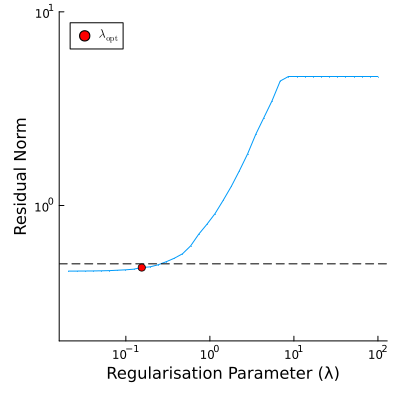

In [ ]:
p = plot(λs[1:end-22], rs[1:end-22],
    xaxis=:log10, yaxis=:log10, ylims=(0.2, 10),
    xlabel="Regularisation Parameter (λ)", ylabel="Residual Norm", 
    label="", marker=:circle, markersize=0, grid=:none, size=(400, 400),
    xticks=[0.01, 0.1, 1, 10, 100],
    yticks=[0.1, 1, 10],
    )
hline!([0.5], linestyle=:dash, color=:black, label="")
scatter!([λs[30]], [rs[30]], label=L"λ_\mathrm{opt}", legend=:topleft, color=:red)

In [184]:
savefig(p, "../figures/Morozov/MDP.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\Morozov\\MDP.svg"